# Single Populations

<!-- * Single populations
  * Are there *any* single populations? 
  * Exponential growth
    * Metabolic basis
  * From populations to alleles
    * Basic pop gen
  * Logistic growth
    * Density dependence
    * Logistic growth as an "effective" model
      * SIS model (VJ)
    * Bifurcations (+Intro to theory - VJ) 
  * Evolutionary dynamics
  * Stochasticity
  * Applications/Examples
  * Stage and age structured populations
    * Stage- vs Age-structured models
    * IPMs
  * Applications/Examples -->

In the [**Metabolic basis of life** chapter](metabolic-basis) we focused on how organisms acquire and transform energy and materials, and how *temperature* and *body/cell size* shape the pace of those processes. In microbes in particular, metabolism sets the tempo of **cell division**: faster energy flux generally supports faster biomass production and shorter doubling times.

This chapter builds directly on that foundation, but shifts the scale of description from *individuals* to **populations**. Population models are, at their core, bookkeeping: they track how births, deaths, and resource limitation change the number of individuals through time. The key idea is that many mechanistic details (enzyme kinetics, ATP production, maintenance costs) can be compressed into a small number of *rates*—and those rates are precisely what metabolism helps us understand and predict.

By the end of this chapter you should be able to:
- Move between **discrete-time** (difference equation) and **continuous-time** (differential equation) descriptions of growth, and know when each is appropriate.
- Interpret exponential growth as a consequence of an approximately constant **per-capita** growth rate, and connect that rate to **doubling time** and (conceptually) to metabolic constraints.
- Add simple, biologically motivated modifiers—especially **temperature dependence**—to growth models (building on the metabolic arguments from the previous chapter).
- Understand why unbounded exponential growth is rarely sustainable, motivating **density dependence** and the **logistic** model as an effective description of limited resources.

As we go, we’ll keep using microbes as a running example for the same reasons as in the previous chapter: they make the discrete nature of reproduction (cell division) obvious, they connect cleanly to metabolic ideas, and they let us test models quickly with simple simulations and data.

## Discrete (Geometric) Growth

Consider a microbial population that reproduces synchronously once per time step (e.g., once every 1 hour, or 1 day, etc.).

### Basic Model

If $N_t$ denotes the population size at discrete time step $t$, then a simple discrete growth model is:

$$ N_{t+1} = R\,N_t. $$

Here:
- $R$ is the **discrete multiplicative growth factor per time step** ($R>1$ for growth, $0<R<1$ for decay).
- Over $T$ steps, $N_T = R^T\,N_0$.

### Example: Synchronous Cell Division
Each microbial cell divides into two after a fixed time step. Then $R=2$. So,

$$ N_{t+1} = 2 N_t. $$

In practice, real cells do not all divide at the exact same moment—division is somewhat stochastic. But if we look at average behavior, we might treat it as a discrete doubling event (especially in a simplified model).

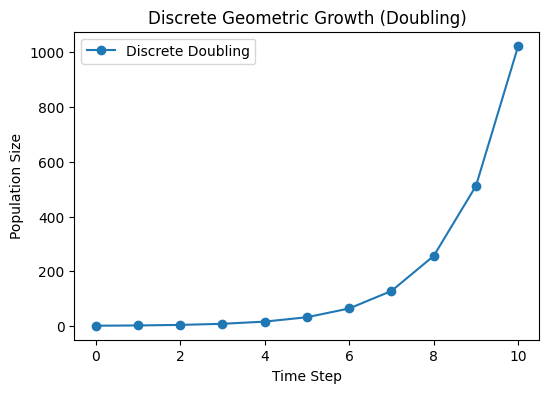

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the discrete model
R = 2.0        # synchronous doubling factor (per time step)
N0 = 1         # initial population (say, 1 cell)
tmax = 10      # number of discrete time steps

# Iterate
N_discrete = [N0]
for _ in range(tmax):
    N_discrete.append(R * N_discrete[-1])

# Plot
time_points = np.arange(tmax + 1)
plt.figure(figsize=(6, 4))
plt.plot(time_points, N_discrete, marker='o', label='Discrete (R=2)')
plt.xlabel('Time step')
plt.ylabel(r'Population size $N$')
plt.title('Discrete geometric growth (doubling)')
plt.legend()
plt.show()

## Continuous Growth

In continuous models, we treat population growth as happening at every instant rather than in discrete steps.

### Exponential Growth
A continuous model can be written as a differential equation:

$$
\frac{dN}{dt} = \mu\,N(t),
$$

where $\mu$ is the intrinsic (per-capita) growth rate (units: time$^{-1}$). The solution is:

$$
N(t) = N_0\,e^{\mu t}.
$$

When interpreted at large population sizes, this model can approximate the effect of many asynchronous cell divisions happening randomly but with an average rate $\mu$.

### Relationship to Discrete Growth
If in the discrete model $N_{t+1} = R\,N_t$, after $T$ time steps, $N_T = R^T N_0$. Comparing with $N(t) = N_0 e^{\mu t}$ for the continuous case, we often identify:

$$
R = e^{\mu\,\Delta t},
$$

assuming each time step is $\Delta t$. So

$$
\mu = \frac{1}{\Delta t}\ln(R).
$$

Thus, discrete and continuous models are conceptually linked. As $\Delta t\rightarrow 0$, discrete growth steps become more closely approximated by a continuous growth process.

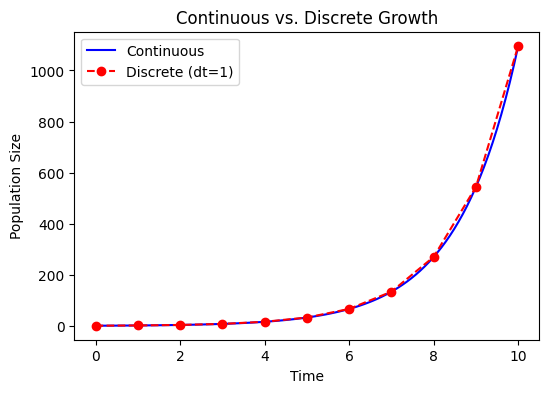

In [ ]:
# Let's compare discrete and continuous growth numerically.

mu = 0.7      # continuous growth rate per time unit
N0_cont = 1   # initial population
t_end = 10.0  # total time

# Continuous solution: dN/dt = mu N(t)
def N_continuous(t, N0, mu):
    return N0 * np.exp(mu * t)

# For discrete steps, pick a time step dt
dt = 1.0
R = np.exp(mu * dt)  # discrete multiplicative factor per time step

num_steps = int(t_end / dt)
N_discrete_model = [N0_cont]
for _ in range(num_steps):
    N_discrete_model.append(R * N_discrete_model[-1])

# Sample the continuous solution densely for plotting
time_array = np.linspace(0, t_end, 200)
N_continuous_vals = N_continuous(time_array, N0_cont, mu)

plt.figure(figsize=(6, 4))
plt.plot(time_array, N_continuous_vals, 'b-', label='Continuous')
plt.plot(np.arange(num_steps + 1), N_discrete_model, 'ro--', label=f'Discrete (dt={dt:g}, R={R:.2f})')
plt.xlabel('Time')
plt.ylabel(r'Population size $N$')
plt.title('Continuous vs discrete exponential growth')
plt.legend()
plt.show()

## Incorporating Metabolic Effects

 > Link back: the key message from [Metabolic basis](metabolic-basis) is that growth and reproduction depend on **energy flux** (metabolic rate) and the **cost** of building/maintaining biomass. In population models, we typically fold that mechanistic detail into a small number of parameters—especially the **per-capita growth rate** $\mu$.

### Temperature Dependence
Enzymatic processes in the cell generally speed up with increasing temperature (until proteins denature at high $T$). For simplicity, we can model $\mu$ via an Arrhenius‐type expression:

$$
\mu(T) = \mu_0 \exp\Bigl(-\frac{E}{k_B T}\Bigr),
$$

where,
- $E$ is an activation energy,
- $k_B$ is Boltzmann's constant (or simply a scaling constant in some biological contexts),
- $\mu_0$ is a pre‐exponential factor.

### Cell‐Size Scaling (MTE)
A common MTE-style assumption is that **whole-organism metabolic rate** scales as $B \propto M^b$ (often $b \approx 3/4$). If growth is limited by energy processing, then a *mass-specific* rate (per unit biomass) scales like $B/M \propto M^{b-1}$. This motivates a size dependence of the intrinsic (per-capita) growth rate:

$$
\mu(T,M) = \mu_0 M^{b-1} \exp\Bigl(-\frac{E}{k_B T}\Bigr).
$$

With $b=3/4$, this gives $\mu \propto M^{-1/4}$: **smaller organisms (or smaller cells) tend to have higher mass-specific growth rates**, all else equal.

### What does size-scaling *do* to the dynamics?
Two practical consequences show up immediately:

1. **Exponential phase (early growth):**

   $$N(t) = N_0 e^{\mu t}$$

   so larger $M$ (smaller $\mu$) means a *shallower* exponential curve. The **doubling time** makes this explicit:

   $$t_d = \frac{\ln 2}{\mu(T,M)} \;\propto\; M^{1-b}\,\exp\Bigl(\frac{E}{k_B T}\Bigr).$$

   For $b=3/4$, $t_d \propto M^{1/4}$: larger organisms generally take longer to double.

2. **Logistic phase (resource limitation):**

   $$\frac{dN}{dt} = \mu(T,M)\,N\Bigl(1-\frac{N}{K}\Bigr)$$

   Size can enter *both* $\mu$ and $K$. A simple energetic argument is: if the environment provides a roughly fixed resource/energy supply rate $S$ and each individual requires metabolic power $B \propto M^{3/4}$, then the maximum sustainable **abundance** scales like

   $$K \propto \frac{S}{B} \propto M^{-3/4}.$$

   This means bigger organisms typically have *lower* carrying capacities in terms of **number of individuals**, even if the total standing **biomass** can be similar or larger (since $K\,M \propto M^{1/4}$ under these assumptions).

   **Abundance vs biomass carrying capacity:** be explicit about what your state variable represents. In the logistic model above, $K$ is a limit on *abundance* $N$. If instead you model total biomass $B_{\text{tot}}=MN$, then the effective “carrying capacity” is a limit on biomass rather than individuals, and scaling with $M$ can look different. This is why comparing $K$ values across taxa of very different size only makes sense once you specify whether you mean **individuals**, **biomass**, or **energy flux**.

Below we’ll visualize these effects in a toy example by letting size change both $\mu$ and $K$.

## Logistic Growth with Temperature & Size Dependence

A standard way to extend exponential growth to include resource limitation is the **logistic model**:

$$
\frac{dN}{dt} = \mu(T,M)\,N \Bigl(1 - \frac{N}{K}\Bigr).
$$

Here $K$ is the **carrying capacity in abundance** (i.e., the maximum sustainable *number of individuals* under the model assumptions). If instead you model biomass (or energy flux) as the state variable, the corresponding “carrying capacity” would be defined in those units and can scale differently with size.

In the previous chapter we motivated how temperature (and, in simple allometric arguments, size) can shape the *per-capita* growth parameter $\mu(T,M)$. A common metabolically motivated form is:

$$
\mu(T,M) = \mu_0\, M^{b-1}\, \exp \Bigl(-\frac{E}{k_B T}\Bigr).
$$

For the commonly used case $b=3/4$, this becomes $\mu(T,M)=\mu_0\,M^{-1/4}\exp\bigl(-E/(k_B T)\bigr)$, so the logistic model can be written as:

$$
\frac{dN}{dt} = \Bigl[
  \underbrace{
    \mu_0\,M^{-\tfrac{1}{4}}
    \exp \Bigl(-\tfrac{E}{k_B T}\Bigr)
  }_{\text{Temperature \& size dependent rate}}
\Bigr]
 N
 \Bigl(1 - \tfrac{N}{K}\Bigr).
$$

<!-- Below, we do a simple numerical integration of this logistic equation. -->

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mu_TM(T, M, mu0=1.0, E=0.65, kB=0.001987, b=0.75):
    """Toy MTE-style intrinsic growth rate mu(T,M).
    
    Notes:
      - This is a deliberately simplified form to show scaling effects.
      - Units depend on how you choose mu0, E, and kB; focus on *relative* differences across M and T.
    """
    return mu0 * (M ** (b - 1.0)) * np.exp(-E / (kB * T))

def K_M(M, K0=1_000.0, exponent=-0.75):
    """Toy size-scaling for carrying capacity in *abundance* (number of individuals)."""
    return K0 * (M ** exponent)

def logistic_euler(N0, mu, K, t_end=20.0, dt=0.01):
    times = np.arange(0.0, t_end + dt, dt)
    N = np.zeros_like(times)
    N[0] = N0
    for i in range(1, len(times)):
        Ni = N[i - 1]
        dN = mu * Ni * (1.0 - Ni / K)
        N[i] = max(0.0, Ni + dN * dt)
    return times, N

# Compare different organism/cell sizes (relative masses) at the same temperature
T = 300.0
masses = np.array([1.0, 16.0, 256.0])  # relative mass units
N0 = 10.0
t_end = 25.0

fig, axes = plt.subplots(1, 2, figsize=(12, 4), constrained_layout=True)

# (1) Exponential phase: size only affects mu, so curves differ in steepness
t = np.linspace(0, t_end, 300)
for M in masses:
    mu = mu_TM(T, M)
    N_exp = N0 * np.exp(mu * t)
    axes[0].plot(t, N_exp, label=f"M={M:g}, mu~{mu:.3f}")
axes[0].set_title("Exponential growth: size changes the slope")
axes[0].set_xlabel("Time")
axes[0].set_ylabel(r"Population size $N$")
axes[0].set_yscale("log")
axes[0].legend()

# (2) Logistic phase: size can affect both mu and K (abundance carrying capacity)
for M in masses:
    mu = mu_TM(T, M)
    K = K_M(M)
    times, N_log = logistic_euler(N0=N0, mu=mu, K=K, t_end=t_end, dt=0.01)
    axes[1].plot(times, N_log, label=f"M={M:g}, K~{K:.0f}")
axes[1].set_title("Logistic growth: size changes both rate and K")
axes[1].set_xlabel("Time")
axes[1].set_ylabel(r"Population size $N$")
axes[1].legend()

plt.show()

### Discrete Logistic Growth, Bifurcations, and Metabolic Constraints

A common **dimensionless** discrete-time model for density dependence is the *logistic map*. For a scaled population $x_t \in [0,1]$ (think $x_t = N_t/K$), it is:

$$
x_{t+1} = r_{\mathrm{map}}\,x_t\,(1-x_t).
$$

This equation can exhibit stable fixed points, cycles of period 2, 4, 8, … and eventually *chaos* as $r_{\mathrm{map}}$ increases.

### Connection to Microbial Growth (and Metabolism)
- In real microbial systems, temperature and cell size affect the **continuous-time** intrinsic growth rate $\mu(T,M)$.
- When we observe populations at discrete intervals (e.g., daily sampling, or per generation), $\mu(T,M)$ induces an effective discrete multiplier $R=e^{\mu\Delta t}$ during the early (near-exponential) phase.
- After rescaling abundances to $x_t\in[0,1]$ and choosing a particular discrete-time model, changes in $T$ and $M$ can be interpreted as shifting an *effective* density-dependent parameter such as $r_{\mathrm{map}}$ (larger $\mu\Delta t$ typically corresponds to larger $r_{\mathrm{map}}$, though the exact mapping depends on how you discretise and rescale).

### Basic Bifurcation Diagram

A *bifurcation diagram* for the logistic map shows, for each $r_{\mathrm{map}}$, the long-term values of $x$ after discarding initial transients:
- At lower $r_{\mathrm{map}}$ (e.g., $0 < r_{\mathrm{map}} < 1$), $x=0$ is stable (extinction).
- For $1 < r_{\mathrm{map}} < 3$, the system approaches a stable fixed point.
- At $r_{\mathrm{map}}=3$, the system bifurcates to a period-2 cycle; further increases give period-4, period-8, etc.
- Around $r_{\mathrm{map}} \approx 3.5699\ldots$, the system enters chaos (with periodic windows).

Below, we implement the standard logistic map, vary $r_{\mathrm{map}}$ in $[0,4]$, iterate many steps, discard transients, and plot the remaining states.

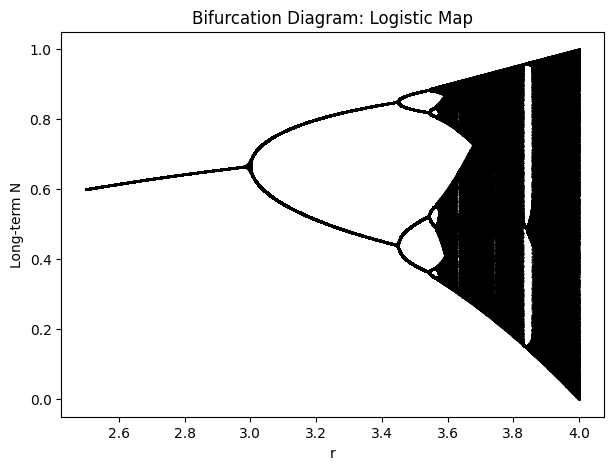

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r_map):
    return r_map * x * (1 - x)

def bifurcation_diagram(r_min=2.5, r_max=4.0, steps=1000, discard=200, resolution=4000):
    """
    Generate (r_map, x) pairs for a bifurcation diagram of the logistic map:
        x_{t+1} = r_map * x_t * (1 - x_t).
    """
    r_values = np.linspace(r_min, r_max, resolution)
    r_list = []
    x_list = []

    for r_map in r_values:
        x = np.random.rand()  # initial condition in (0,1)
        for _ in range(discard):
            x = logistic_map(x, r_map)
        for _ in range(discard, steps):
            x = logistic_map(x, r_map)
            r_list.append(r_map)
            x_list.append(x)

    return np.array(r_list), np.array(x_list)

r_bif, x_bif = bifurcation_diagram(r_min=2.5, r_max=4.0, steps=1000, discard=200, resolution=2000)

plt.figure(figsize=(7, 5))
plt.scatter(r_bif, x_bif, s=0.1, color='black')
plt.xlabel(r'$r_{\mathrm{map}}$')
plt.ylabel(r'Long-term $x$')
plt.title('Bifurcation diagram: logistic map')
plt.show()

### Interpreting Temperature & Cell-Size Effects as Parameter Shifts

To connect continuous-time growth rates back to discrete-time dynamics, it helps to separate three related (but distinct) objects:
- $\mu(T,M)$: a **continuous-time** intrinsic growth rate (units time$^{-1}$)
- $R=e^{\mu\Delta t}$: a **discrete multiplicative factor** over an observation interval $\Delta t$ during the near-exponential phase
- $r_{\mathrm{map}}$: a **dimensionless** parameter in a chosen discrete-time density-dependent map (like the logistic map)

One simple way to discretise the continuous logistic model is an Euler step:

$$
N_{t+1} = N_t + \mu(T,M)\,N_t\Bigl(1 - \frac{N_t}{K}\Bigr)\,\Delta t.
$$

If we scale by $K$ and define $x_t = N_t/K$, then:

$$
x_{t+1} = x_t + \mu(T,M)\,\Delta t\,x_t(1-x_t).
$$

The **logistic map** is a different (but qualitatively similar) discrete-time model:

$$
x_{t+1} = r_{\mathrm{map}}\,x_t(1-x_t).
$$

Important subtlety: $r_{\mathrm{map}}$ is **dimensionless** and depends on the chosen time step and rescaling. For small $\mu\Delta t$, the Euler form behaves like a gentle density-dependent correction to exponential growth; increasing $T$ or decreasing $M$ typically increases $\mu(T,M)$ and therefore increases the effective “strength” of growth over a step, which you can think of as pushing you toward larger effective $r_{\mathrm{map}}$ in map-based models (though the exact correspondence depends on your discretisation choice).

Hence, *sweeping* $r_{\mathrm{map}}$ from ~2.5 to 4.0 in the standard logistic map can be thought of (qualitatively) as increasing the effective growth-per-step, which in real systems could arise from changes in temperature and/or organism size.

Thus, bifurcation analysis of the logistic map reveals:
- Stable equilibria at low growth parameters
- Period-doubling routes to chaos as $r_{\mathrm{map}}$ increases
- Complex behaviours including periodic windows embedded in chaos

### Making Bifurcation Points Depend on Size and Temperature
The logistic map’s bifurcation points occur at fixed values of $r_{\mathrm{map}}$ (e.g., period-doubling starts at $r_{\mathrm{map}}=3$). Metabolism and size do **not** change those numerical values; instead they change the mapping from biology ($T$, $M$) to the **effective** growth-per-step parameter $r_{\mathrm{map}}$.

A simple way to *show* this is:
1. Choose a mapping $r_{\mathrm{map}} = g(\mu(T,M)\,\Delta t)$ that is monotone increasing in $\mu\Delta t$.
2. Use Arrhenius + allometry for $\mu(T,M)$.
3. Plot $r_{\mathrm{map}}(T)$ for different $M$ values and mark where it crosses the canonical bifurcation thresholds.

Below we use the simplest monotone mapping $r_{\mathrm{map}} = \exp(\mu\Delta t)$ (so that $\ln r_{\mathrm{map}} = \mu\Delta t$). This is not the only possible mapping, but it’s easy to interpret and makes the dependence on $T$ and $M$ explicit.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Model ingredients (reuse mu_TM from earlier if it exists) ---
try:
    mu_TM
except NameError:
    def mu_TM(T, M, mu0=1.0, E=0.65, kB=0.001987, b=0.75):
        return mu0 * (M ** (b - 1.0)) * np.exp(-E / (kB * T))

def r_map_from_mu(mu, dt_map):
    """Simple monotone mapping from continuous-time rate to logistic-map parameter."""
    return np.exp(mu * dt_map)

# Canonical bifurcation thresholds for the logistic map x_{t+1} = r_map x_t (1-x_t)
r_thresholds = {
    "fixed point → period-2": 3.0,
    "period-2 → period-4": 1.0 + np.sqrt(6.0),  # ≈ 3.44949
    "period-4 → period-8": 3.544090359551922,
    "period-8 → period-16": 3.564407266094041,
    "chaos onset (accumulation)": 3.569945672,
}

# Choose an observation interval (dt_map) by calibration:
# Here: pick dt_map so that at a reference (T_ref, M_ref) we sit exactly at the first period-doubling r_map=3.
T_ref = 300.0
M_ref = 1.0
mu_ref = mu_TM(T_ref, M_ref)
dt_map = np.log(r_thresholds["fixed point → period-2"]) / mu_ref

print(f"Calibration: at T={T_ref} K, M={M_ref}, dt_map={dt_map:.3f} gives r_map=3")

# Compute r_map(T) curves for different sizes
T_grid = np.linspace(270.0, 390.0, 600)
masses = np.array([1.0, 16.0, 256.0])

plt.figure(figsize=(9, 5))
for M in masses:
    mu_vals = mu_TM(T_grid, M)
    r_vals = r_map_from_mu(mu_vals, dt_map)
    plt.plot(T_grid, r_vals, label=f"M={M:g}")

# Add horizontal lines at bifurcation thresholds
for name, r_star in r_thresholds.items():
    plt.axhline(r_star, color='k', alpha=0.2)
    plt.text(T_grid[0] + 1.0, r_star + 0.01, name, fontsize=9, alpha=0.7)

plt.ylim(2.5, 4.05)
plt.xlabel("Temperature (K)")
plt.ylabel(r"Effective logistic-map parameter $r_{\mathrm{map}}$")
plt.title("Size + temperature shift the *conditions* at which bifurcations occur")
plt.legend(title="Relative mass")
plt.grid(True, alpha=0.2)
plt.show()

# Optional: estimate the temperature at which each bifurcation threshold is reached for each mass
def crossing_temperature(T, y, y_star):
    """Return approximate T where y(T) crosses y_star (assumes monotone and crossing exists)."""
    diff = y - y_star
    idx = np.where(np.sign(diff[:-1]) * np.sign(diff[1:]) <= 0)[0]
    if len(idx) == 0:
        return None
    i = idx[0]
    # linear interpolation in T
    t0, t1 = T[i], T[i + 1]
    d0, d1 = diff[i], diff[i + 1]
    if d1 == d0:
        return float(t0)
    return float(t0 + (0 - d0) * (t1 - t0) / (d1 - d0))

print("\nApprox threshold temperatures (K):")
for M in masses:
    r_vals = r_map_from_mu(mu_TM(T_grid, M), dt_map)
    temps = {name: crossing_temperature(T_grid, r_vals, r_star) for name, r_star in r_thresholds.items()}
    temps_fmt = {k: (None if v is None else round(v, 1)) for k, v in temps.items()}
    print(f"  M={M:g}: {temps_fmt}")

## Considering External Impacts on Population Growth

So far, the logistic model treats population growth as self-limited by density:

$$
\frac{dN}{dt} = \mu\,N\Bigl(1 - \frac{N}{K}\Bigr),
$$

where $\mu$ is the intrinsic (per-capita) growth rate and $K$ is the carrying capacity (in abundance). In reality, populations are also affected by external factors such as predators, pathogens, competitors, or harvesting.

Suppose the predator population is $P$, and per-predator consumption depends on prey abundance through a functional response $f(N)$. Then predation removes $f(N)P$ prey per unit time, giving:

$$
\frac{dN}{dt} = \mu\,N\Bigl(1 - \frac{N}{K}\Bigr) - f(N)P.
$$

If consumed prey are converted into predator births with efficiency $e$, and predators die at per-capita rate $m$, then predator dynamics are:

$$
\frac{dP}{dt} = e f(N)P - mP.
$$

Together:

$$
\begin{aligned}
&\frac{dN}{dt} = \mu N \left(1 - \frac{N}{K}\right) - f(N)P,\\
&\frac{dP}{dt} = e f(N)P - mP.
\end{aligned}
$$

To simplify, take a linear functional response $f(N)=aN$ (Type I). Then:

$$
\begin{aligned}
&\frac{dN}{dt} = \mu N \left(1 - \frac{N}{K}\right) - aNP,\\
&\frac{dP}{dt} = eaNP - mP.
\end{aligned}
$$

If we interpret $N$ as a resource $R$ and predators as consumers $C$, and define $w = ea$, we can write a simple consumer–resource model:

$$
\begin{aligned}
&\frac{dR}{dt} = \mu R \left(1 - \frac{R}{K}\right) - aRC,\\
&\frac{dC}{dt} = wRC - mC.
\end{aligned}
$$

### A Simple Example

When we consider a system with one consumer and one resource:

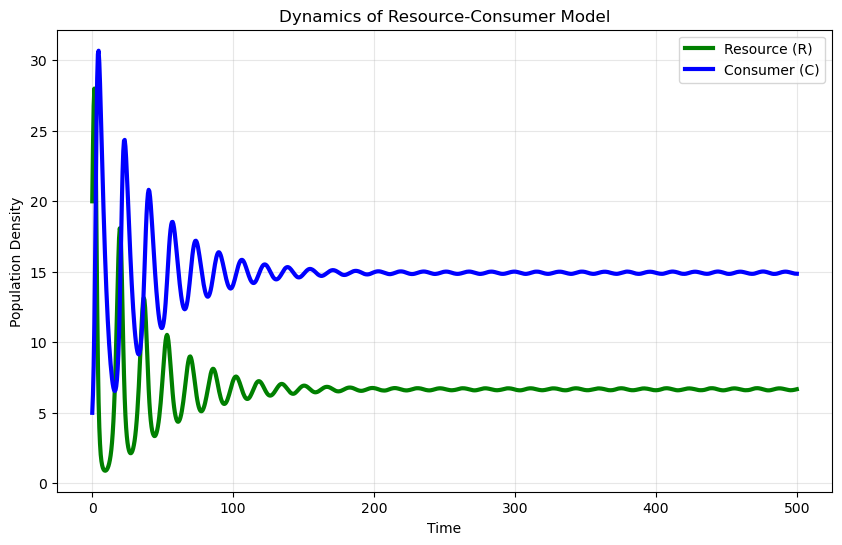

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters for the consumer–resource model
mu = 0.8   # intrinsic growth rate of resource (time^-1)
K = 100    # carrying capacity of resource (abundance)
a = 0.05   # consumption rate
w = 0.03   # conversion efficiency parameter (w = e*a in the linear-response case)
m = 0.2    # mortality rate of consumer (time^-1)

# Time parameters
t_start = 0
t_end = 500
t_eval = np.linspace(t_start, t_end, 1000)

# Initial conditions
initial_conditions = [20, 5]  # [Resource, Consumer]

def resource_consumer_model(t, y):
    """ODE system for a simple consumer–resource model."""
    R, C = y
    dR_dt = mu * R * (1 - R / K) - a * R * C
    dC_dt = w * R * C - m * C
    return [dR_dt, dC_dt]

solution = solve_ivp(
    resource_consumer_model,
    [t_start, t_end],
    initial_conditions,
    t_eval=t_eval,
    method='RK45',
)

time = solution.t
resource = solution.y[0]
consumer = solution.y[1]

plt.figure(figsize=(10, 6))
plt.plot(time, resource, 'g-', linewidth=3, label='Resource (R)')
plt.plot(time, consumer, 'b-', linewidth=3, label='Consumer (C)')
plt.xlabel('Time')
plt.ylabel('Population density')
plt.title('Dynamics of a consumer–resource model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Exercise template: fit a logistic curve (simple approach)
import numpy as np
import matplotlib.pyplot as plt

# Optional: requires scipy
from scipy.optimize import curve_fit

# TODO: replace with real saturating-growth data
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=float)
N = np.array([1, 2, 4, 8, 15, 25, 40, 55, 65], dtype=float)

# Closed-form logistic solution for fitting: N(t) = K / (1 + A e^{-mu t})
def logistic_solution(t, mu, K, A):
    return K / (1.0 + A * np.exp(-mu * t))

# Initial guesses
K0 = N.max()
mu0 = 0.5
A0 = (K0 / N[0]) - 1.0
p0 = [mu0, K0, A0]

params, cov = curve_fit(logistic_solution, t, N, p0=p0, bounds=(0, np.inf))
mu_hat, K_hat, A_hat = params
print(f"Estimated mu = {mu_hat:.4f} (time^-1)")
print(f"Estimated K  = {K_hat:.3f}")

t_fine = np.linspace(t.min(), t.max(), 300)
N_fit = logistic_solution(t_fine, mu_hat, K_hat, A_hat)

plt.figure(figsize=(6, 4))
plt.scatter(t, N, label='data')
plt.plot(t_fine, N_fit, label='logistic fit')
plt.xlabel('Time')
plt.ylabel(r'Population size $N$')
plt.title('Logistic fit')
plt.legend()
plt.show()

In [ ]:
# Exercise template: estimate mu from (t, N) data
import numpy as np
import matplotlib.pyplot as plt

# TODO: replace with real data (time in hours/days, N in cells/mL etc.)
t = np.array([0, 1, 2, 3, 4, 5], dtype=float)
N = np.array([1, 1.9, 3.8, 7.4, 14.8, 29.0], dtype=float)

# Fit ln(N) = a + mu * t via least squares
logN = np.log(N)
A = np.column_stack([np.ones_like(t), t])
a_hat, mu_hat = np.linalg.lstsq(A, logN, rcond=None)[0]
N0_hat = np.exp(a_hat)
t_d = np.log(2) / mu_hat

print(f"Estimated mu = {mu_hat:.4f} (time^-1)")
print(f"Estimated N0 = {N0_hat:.3f}")
print(f"Doubling time t_d = {t_d:.3f} time units")

# Visualise fit
t_fine = np.linspace(t.min(), t.max(), 200)
N_fit = N0_hat * np.exp(mu_hat * t_fine)
plt.figure(figsize=(6, 4))
plt.scatter(t, N, label='data')
plt.plot(t_fine, N_fit, label='exp fit')
plt.yscale('log')
plt.xlabel('Time')
plt.ylabel(r'Population size $N$')
plt.title('Exponential fit (log scale)')
plt.legend()
plt.show()

## Exercises

These are intended to be short modelling + coding tasks that reinforce the main ideas (discrete vs continuous time, $\mu$ vs $R$, density dependence, and how $T$ and $M$ enter via metabolism). Feel free to treat the ones marked **(Extension)** as optional.

### 1) Estimate $\mu$ and doubling time from data
You are given time series data $(t_i, N_i)$ during the early growth phase. Assuming exponential growth $N(t)=N_0 e^{\mu t}$:
- Fit $\mu$ by regressing $\ln N$ on $t$.
- Report the doubling time $t_d = \ln 2/\mu$.
- Convert the estimate to a discrete-time multiplier $R=e^{\mu\Delta t}$ for a chosen sampling interval $\Delta t$.

### 2) Discrete vs continuous: when does it matter?
Simulate exponential growth in two ways over the same total time:
- Continuous: $N(t)=N_0 e^{\mu t}$
- Discrete: $N_{t+1}=R N_t$ with $R=e^{\mu\Delta t}$
Vary $\Delta t$ and quantify the approximation error (e.g., max relative error across times).

### 3) Fit a logistic model and interpret parameters
Given data that include saturation, fit the continuous logistic model:
$$\frac{dN}{dt}=\mu N\left(1-\frac{N}{K}\right).$$
- Estimate $\mu$ and $K$ (e.g., nonlinear least squares).
- Check how sensitive your fitted $K$ is to excluding early vs late points.
- Plot residuals and discuss where the model is systematically wrong (lag phase, measurement noise, etc.).

### 4) Arrhenius temperature dependence (calibrate $E$)
Assume $\mu(T)=\mu_0\exp\left(-\frac{E}{k_B T}\right)$.
- Given two growth-rate measurements $(T_1,\mu_1)$ and $(T_2,\mu_2)$, solve for $E$ (and/or $\mu_0$).
- Plot predicted $\mu(T)$ across a temperature range and overlay the observed points.

### 5) Size scaling (allometry) across taxa
Assume $\mu(T,M)=\mu_0 M^{b-1}\exp\left(-\frac{E}{k_B T}\right)$ and (optionally) $K \propto M^{-3/4}$ for abundance carrying capacity.
- On log–log axes, plot $\mu$ vs $M$ at fixed $T$ and estimate the slope.
- Explore how changing $b$ changes dynamics in the logistic model.

### 6) Temperature/size shifts in bifurcation ‘conditions’
Using your mapping $r_{\mathrm{map}} = g(\mu\Delta t)$ (e.g., $r_{\mathrm{map}}=e^{\mu\Delta t}$):
- For several masses $M$, compute and plot $r_{\mathrm{map}}(T)$.
- Mark where the curve crosses $r_{\mathrm{map}}=3$ (period-doubling onset).
- **(Extension)** also mark $1+\sqrt{6}$ and the chaos accumulation point $\approx 3.56995$.

### 7) Add stochasticity to growth (demographic vs environmental)
Modify exponential or logistic growth to include randomness, e.g.:
- Environmental noise: $\mu_t = \mu + \sigma\,\varepsilon_t$ with $\varepsilon_t\sim\mathcal{N}(0,1)$
- Demographic noise: births/deaths as Poisson or binomial draws per step
Compare mean trajectories and variance across replicate simulations.

### 8) Consumer–resource model exploration
For the consumer–resource model in this notebook:
- Find equilibria analytically.
- Simulate for different parameter sets and classify behaviour (damped oscillations, sustained oscillations, collapse).
- **(Extension)** make $\mu$ temperature dependent ($\mu(T)$) and explore how warming shifts stability.

## Summary

* Microbial cell division is inherently discrete (integer splits), but at large population sizes, overall growth can often be approximated by continuous models.
* Exponential growth describes unlimited resources and is governed by an intrinsic (per-capita) growth rate $\mu$; in discrete time this corresponds to a step multiplier $R=e^{\mu\Delta t}$.
* Logistic growth incorporates resource limitation via a carrying capacity $K$ (typically in abundance unless otherwise stated).
* Reaction rates (and thus growth) typically increase with temperature in an Arrhenius/Eyring-like way—up to an optimum or denaturation point in real cells.
* Metabolic theory suggests size ($M$) dependence (e.g., $\mu\propto M^{b-1}$). Smaller organisms often have higher mass-specific growth rates.
* Real microbial growth can be more complex (lag phases, variable yields, toxin accumulation, pH shifts, etc.). The models here are minimal but illustrate core ideas.
* In discrete-time density-dependent models like the logistic map, increasing the effective growth-per-step (e.g., via higher temperature) can push the system toward larger $r_{\mathrm{map}}$ and more complex dynamics.
* Most laboratory cultures do not effectively operate at very large $r_{\mathrm{map}}$ per step, but ecological systems (e.g., pulsed resources, chemostats) can approach regimes where discrete-time dynamics become rich.

### References

- Arrhenius, S. 1889. *Über die reaktionsgeschwindigkeit bei Inversion von rohrzucker durch Säuren.* Z. Phys. Chem.
- Verhulst, P. 1838. *Notice sur la loi que la population poursuit dans son accroissement.* Corr. Math. Phys.
- West, G.B., Brown, J.H., & Enquist, B.J. 1997. *A general model for the origin of allometric scaling laws in biology.* Science, 276.
- Brown, J.H. et al. 2004. *Toward a Metabolic Theory of Ecology.* Ecology, 85, 1771–1789.
- ratkowsky, D.A. et al. 1982. *relationship between temperature and growth rate of bacterial cultures.* J. Bacteriol.
- Schaechter, M., Maaløe, O. & Kjeldgaard, N.O. 1958 & 1962. *Dependency on medium and temperature of cell size and chemical composition during balanced growth of Salmonella typhimurium.* J. Gen. Microbiol.
- May, r. M. (1976). *Simple mathematical models with very complicated dynamics.* Nature, 261, 459–467. (Seminal paper on logistic map chaos.)  
- Feigenbaum, M. J. (1978). *Quantitative universality for a class of nonlinear transformations.* Journal of Statistical Physics, 19, 25–52. (Period-doubling universality.)  